# Exercises

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# From solutions this is useful:
# from pylab import rcParams
# rcParams['figure.figsize'] = 10, 5

In [2]:
athletes = pd.read_csv('data/athletes.csv')
countries = pd.read_csv('data/countries.csv')

In [3]:
print(athletes.shape)
print(countries.shape)

(11538, 11)
(201, 2)


In [5]:
countries.head()

,country,code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,ALG
3,American Samoa*,ASA
4,Andorra,AND


In [8]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
id             11538 non-null int64
name           11538 non-null object
nationality    11538 non-null object
sex            11538 non-null object
dob            11537 non-null object
height         11208 non-null float64
weight         10879 non-null float64
sport          11538 non-null object
gold           11538 non-null int64
silver         11538 non-null int64
bronze         11538 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 991.6+ KB


In [4]:
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


## 1. What was the average age in male and female athletes?

In [12]:
athletes.dob = pd.to_datetime(athletes.dob)

In [25]:
# age done roughly, we should also check day and month but that's ok for my purposes:
athletes['age'] = 2016 - athletes.dob.dt.year

In [27]:
athletes.groupby('sex').age.mean()

sex
female    25.908549
male      26.540114
Name: age, dtype: float64

## 2. What are the most common Dates of Birth?

*To clarify - day, month, year*

In [31]:
athletes.dob.value_counts()[:20]

1988-03-05    9
1990-12-20    9
1993-02-18    9
1988-04-03    8
1991-06-19    8
1989-12-14    8
1993-07-30    8
1990-05-02    8
1993-03-03    8
1989-03-01    8
1988-04-29    8
1989-06-09    8
1990-03-14    7
1994-10-25    7
1994-08-19    7
1991-08-18    7
1991-02-08    7
1991-04-16    7
1990-07-11    7
1993-03-29    7
Name: dob, dtype: int64

## 3. How about the most common birthdays?

*To clarify - day, month*

In [36]:
athletes['birthday'] = athletes.dob.apply(lambda x: str(x.day) + '/' + str(x.month))

In [38]:
athletes.birthday.value_counts()[:20]

1/1     58
5/2     51
10/2    48
20/1    47
19/9    47
10/1    47
5/4     46
5/3     45
29/4    44
30/4    44
13/1    44
8/3     44
14/2    43
2/5     43
30/9    43
12/7    43
7/1     42
15/5    42
11/3    42
26/5    42
Name: birthday, dtype: int64

## 4. What are the Countries with more than 100 medals?

In [39]:
athletes['total_medals'] = athletes.gold + athletes.silver + athletes.bronze

In [46]:
countries = countries.merge(athletes.groupby('nationality')['gold', 'silver', 'bronze', 'total_medals'].sum(),
                            how='left',
                            left_on='code',
                            right_index=True)

In [51]:
countries_100_medals = countries[countries.total_medals > 100].sort_values(by='total_medals', ascending=False)

In [52]:
countries_100_medals

,country,code,gold,silver,bronze,total_medals
191,United States,USA,139.0,54.0,71.0,264.0
70,Germany,GER,49.0,44.0,67.0,160.0
190,United Kingdom,GBR,64.0,55.0,26.0,145.0
150,Russia,RUS,52.0,29.0,34.0,115.0
40,China,CHN,46.0,30.0,37.0,113.0


## 5. Create a bar or pie chart for the results of the previous exercise.

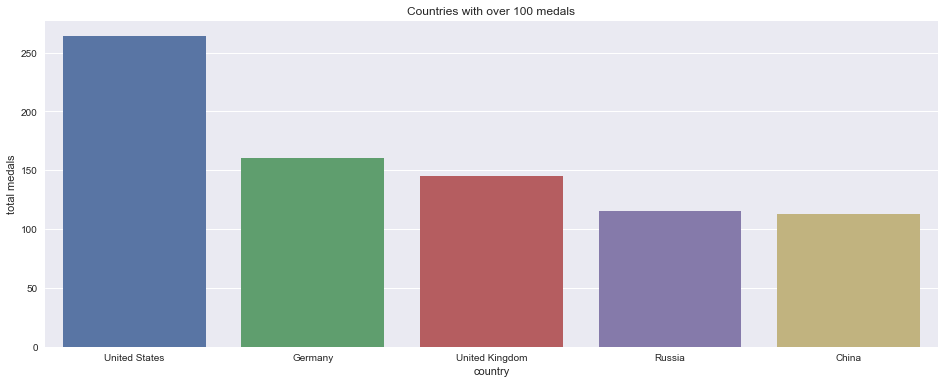

In [80]:
fig = plt.figure(figsize=(16, 6))
ax = sns.barplot(countries_100_medals.country, countries_100_medals.total_medals)
ax.set_ylabel('total medals')
ax.set_title('Countries with over 100 medals');

## 6. Male weightlifting competitions are divided into 8 weight classes. Can you estimate these weight classes by looking at the data? Hint: Create a scatter plot with Body weight on the x-axis and choose height as y.

In [104]:
weightlifting = athletes[(athletes.sex == 'male') & (athletes.sport == 'weightlifting')].copy()

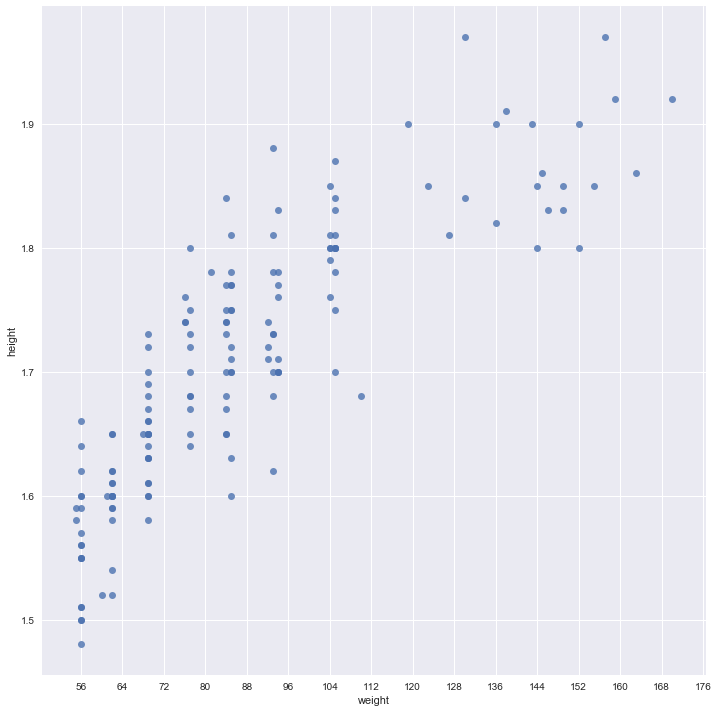

In [88]:
ax = sns.lmplot('weight', 'height', weightlifting, fit_reg=False, size = 10)
ax.ax.xaxis.set_major_locator(plt.MaxNLocator(20));

In [98]:
def weightlifting_class(df):
    if df.weight < 57:
        cl = 1
    elif df.weight < 64:
        cl = 2
    elif df.weight < 72:
        cl = 3
    elif df.weight < 80:
        cl = 4
    elif df.weight < 88:
        cl = 5
    elif df.weight < 96:
        cl = 6
    elif df.weight < 112:
        cl = 7
    else:
        cl = 8
    return cl

In [105]:
weightlifting['class'] = weightlifting.apply(weightlifting_class, axis=1)

In [106]:
weightlifting

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age,birthday,total_medals,class
120,242818896,Adrian Edward Zielinski,POL,male,1989-03-28,1.70,94.0,weightlifting,0,0,0,27.0,28/3,0,6
186,162169475,Ahmed Mohamed,EGY,male,1988-04-27,1.85,144.0,weightlifting,0,0,0,28.0,27/4,0,8
189,101574216,Ahmed Saad,EGY,male,1986-11-01,1.60,62.0,weightlifting,0,0,0,30.0,1/11,0,2
403,745034260,Alexandr Spac,MDA,male,1989-11-21,1.64,77.0,weightlifting,0,0,0,27.0,21/11,0,4
405,928138606,Alexandr Zaichikov,KAZ,male,1992-08-17,1.80,105.0,weightlifting,0,0,1,24.0,17/8,1,7
437,434694198,Alexej Prochorow,GER,male,1990-03-30,1.91,138.0,weightlifting,0,0,0,26.0,30/3,0,8
461,800154411,Ali Hashemi,IRI,male,1991-11-01,1.78,93.0,weightlifting,0,0,0,25.0,1/11,0,6
476,502227727,Aliaksandr Bersanau,BLR,male,1992-09-01,1.76,94.0,weightlifting,0,0,0,24.0,1/9,0,6
481,185532375,Aliaksei Mzhachyk,BLR,male,1996-06-30,1.90,136.0,weightlifting,0,0,0,20.0,30/6,0,8
546,949130459,Almir Velagic,GER,male,1981-08-22,1.83,149.0,weightlifting,0,0,0,35.0,22/8,0,8


## 7. Generate a histogram of male and female height distribution among all participants.

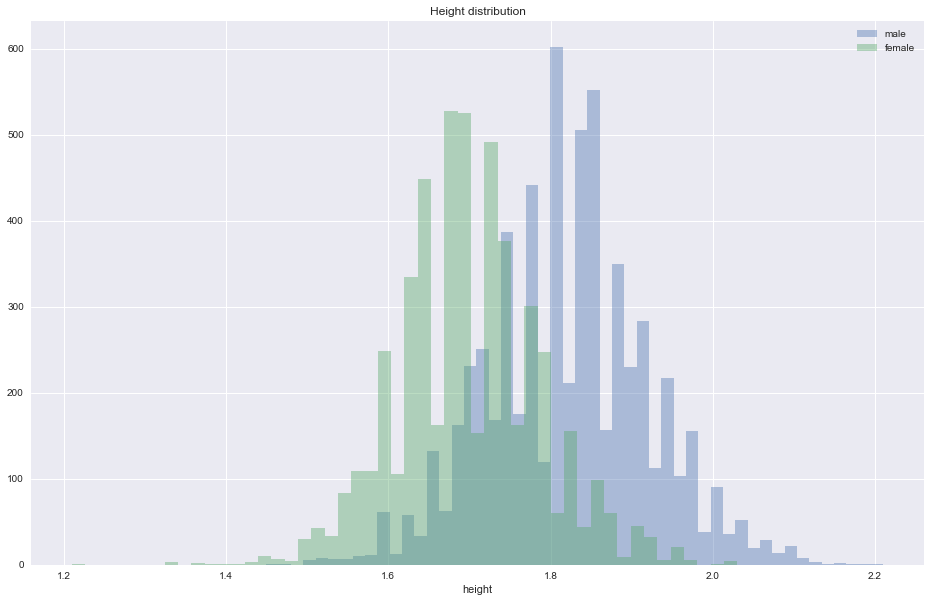

In [122]:
fig = plt.figure(figsize=(16, 10))
ax = sns.distplot(athletes[athletes.sex == 'male'].height.dropna(), kde=False, label='male')
ax = sns.distplot(athletes[athletes.sex == 'female'].height.dropna(), kde=False, label='female')
ax.set_xlabel('height')
ax.set_title('Height distribution')
ax.legend();

## 8. Using the Seaborn package create a box plot for male and female height distribution among all participants.

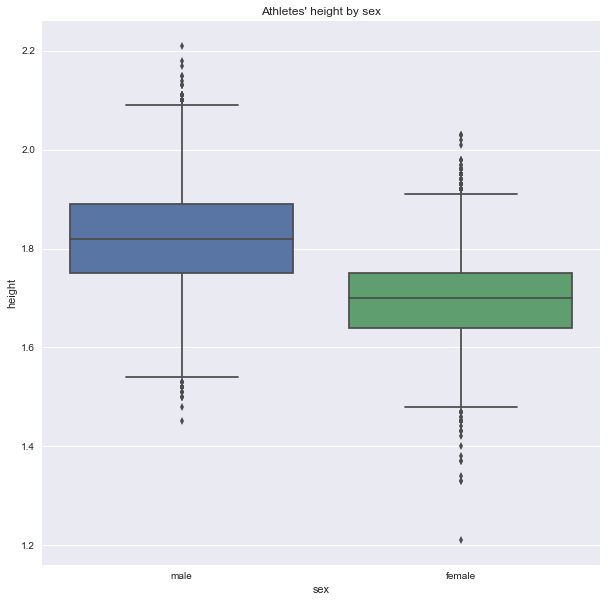

In [128]:
fig = plt.figure(figsize=(10, 10))
ax = sns.boxplot(x='sex', y='height', data=athletes)
ax.set_title('Athletes\' height by sex');

## 9. _Optional_: What else would you try?